# Explore the reference network


- [Crossref](https://www.crossref.org/) provides an API to get the references of a publication ([rest-api-doc](https://github.com/CrossRef/rest-api-doc)).


- The idea is to go down the references network for a fixed number of steps (for example 3), then keep only the articles which have been visited more than N times (for examples 3 times), and draw the upward graph starting from these articles. 


## To do:
- remove MetaData class, +clean doi_list
- resolve identical label
- deals with ghost ref, i.e. without doi
- stats:  n ref vs n citation, review vs foundational
- coloring: disconnected component for the 1st generation references, authors based cluster 
- interactive app + flask

- look at: https://en.wikipedia.org/wiki/Bibliographic_coupling

### With more data:
- use 'store' from scopus manual export + [query ref resolver](https://www.crossref.org/labs/resolving-citations-we-dont-need-no-stinkin-parser/), https://search.crossref.org/references

- get country/city/univ  get flag/favicon


### with scopus 'cited by':
- doi list cited by  + cited by count
- query each
- graph


In [1]:
import crossrefexp as exp

In [2]:
store = exp.MetaDataStore('data/cachemetadata.pickle')

164 metadata loaded from `data/cachemetadata.pickle`


In [3]:
doi1 = "10.1103/PhysRevA.62.012306"
doi2 = "10.1103/PhysRevA.97.022108"

In [4]:
# doi = "10.1063/1.337221"

In [5]:
# Query metadata on Crossref
store.query([doi1, doi2])
print( '\n', store.get_info(doi1) )
print( '\n', store.get_info(doi2) )

  1/2: 10.1103/PhysRevA.62.012306 already present.
  2/2: 10.1103/PhysRevA.97.022108 already present.
data/cachemetadata.pickle saved.

 Electron-spin-resonance transistors for quantum computing in silicon-german...
(2000) Physical Review A
Rutger Vrijen, Eli Yablonovitch, Kang Wang, Hong Wen Jiang, Alex Balandin, Vwani Roychowdhury, Tal Mor, David DiVincenzo
35 references - 31 with doi


 Zeno effect of an open quantum system in the presence of 
1/f
 noise
(2018) Physical Review A
Shu He, Chen Wang, Li-Wei Duan, Qing-Hu Chen
59 references - 57 with doi



growth achieved - 32 nodes in the graph. The last generation number is 1.
growth achieved - 340 nodes in the graph. The last generation number is 2.
metadata for 10.1098/rspa.1992.0167 retrieved from Crossref in 0.458998 s.
data/cachemetadata.pickle saved.
graphs/Vrijen2000_gen2_top20_noSecondaryLink.svg  saved


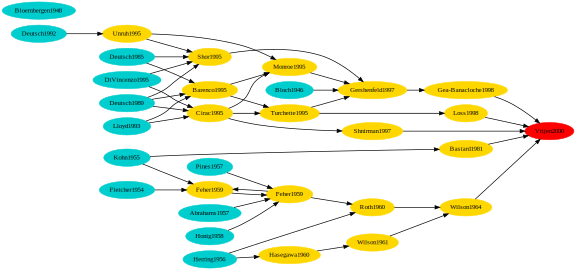

In [6]:
# Build the graph and everything:
gr = store.get_refgraphviz( [doi1], gen=2, top=20, draw_secondary_links=False )
gr

In [ ]:
# List of the top cited refs.
gr = store.build_a_refgraph( doi1, gen=2 )
print('-- Top cited: --')
for doi, citedby_count in gr.most_cited()[:20]:
    metadata = store.get(doi)
    print( '{}\t cited {} times [gen{}]  {}'.format(metadata.label(),
                                                   citedby_count, 
                                                   gr[doi]['gen'],
                                                   metadata.get('URL')) )